## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [14]:
import pandas as pd
import graphviz 

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# Use uma string bruta (prefixo 'r') para evitar problemas de escape
boston = r'C:\Users\moona\Downloads\housing.csv'

# Leia o arquivo CSV e estabeleça a variável 'boston'
boston = pd.read_csv('housing.csv')

# Supondo que a última coluna seja o alvo (target)
X = boston.iloc[:, :-1]  # Todas as colunas exceto a última
y = boston.iloc[:, -1]   # Apenas a última coluna

# Verifique as primeiras linhas para garantir que o arquivo foi lido corretamente
print("Primeiras linhas de X:")
print(X.head())

print("\nPrimeiras linhas de y:")
print(y.head())

Primeiras linhas de X:
      RM  LSTAT  PTRATIO
0  6.575   4.98     15.3
1  6.421   9.14     17.8
2  7.185   4.03     17.8
3  6.998   2.94     18.7
4  7.147   5.33     18.7

Primeiras linhas de y:
0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MDEV, dtype: float64


In [4]:
boston.head()

,RM,LSTAT,PTRATIO,MDEV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [8]:
#Dividindo a variável target
X = boston.drop(columns = 'MDEV' , axis = 1)
y = boston.MDEV

In [6]:
X.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [9]:
y.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MDEV, dtype: float64

In [11]:
#Separadando a base em treino e test
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size  = 0.3 , random_state = 100) 

#Criando duas árvores com profundidades diferentes
clf1 = DecisionTreeRegressor(max_depth = 2)
clf2 = DecisionTreeRegressor(max_depth = 8)

#Treinando base 1
clf1.fit(X_train , y_train)
#Treinando base 2
clf2.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=8)

In [12]:
#Calculando R quadrático de cada árvore
rquad1 = clf1.score(X_train , y_train)
rquad2 = clf2.score(X_train , y_train)

print('O R quadrático da árvore de profundidade 2 é {:.2f}'.format(rquad1).replace('.',','))
print('O R quadrático da árvore de profundidade 8 é {:.2f}'.format(rquad2).replace('.',','))

if rquad1 > rquad2:
    print('\nA árvore com profundidade 2 é mais indicada')
else:
    print('\nA árvore com produndidade 8 é mais indicada')

O R quadrático da árvore de profundidade 2 é 0,72
O R quadrático da árvore de profundidade 8 é 0,97

A árvore com produndidade 8 é mais indicada


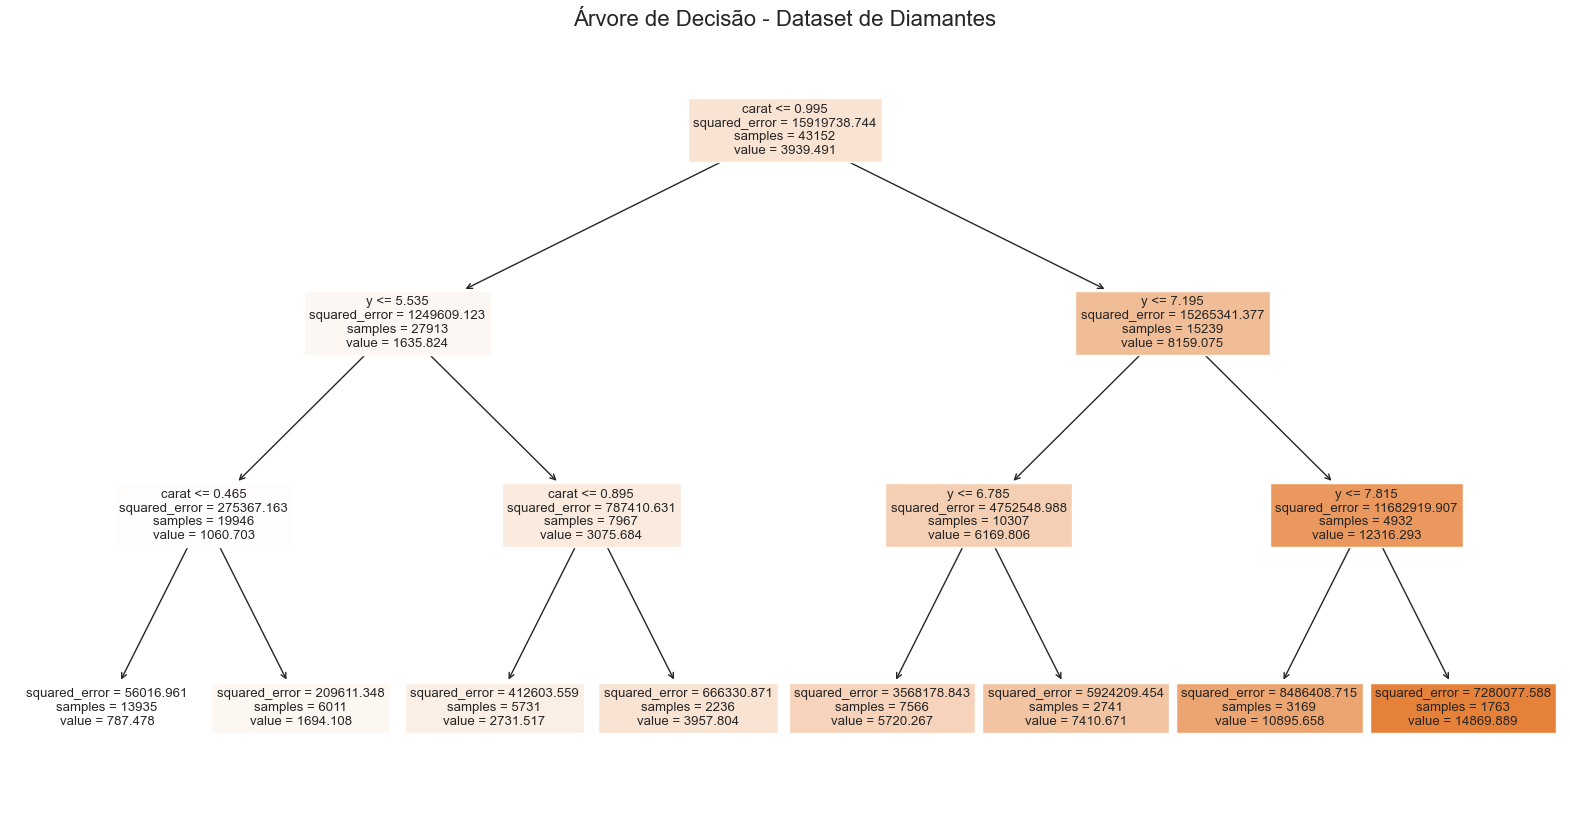

In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Carregar o dataset do Boston Housing a partir do seaborn
boston = sns.load_dataset('diamonds')  # Usando um dataset exemplo do seaborn

# Preparar os dados (ajustar as colunas conforme necessário)
X = boston.drop(['price', 'cut', 'color', 'clarity'], axis=1)  # Supondo que a coluna 'price' é o target
y = boston['price']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar um modelo de árvore de decisão
clf2 = DecisionTreeRegressor(max_depth=3)
clf2.fit(X_train, y_train)

# Configurar o estilo do Seaborn
sns.set_style("whitegrid")

# Plotar a árvore de decisão com Matplotlib ajustado ao estilo Seaborn
plt.figure(figsize=(20, 10))
plot_tree(clf2, feature_names=X.columns, filled=True)
plt.title("Árvore de Decisão - Dataset de Diamantes", fontsize=16)
plt.show()


In [20]:
#Realizando pré-poda
regr1 = DecisionTreeRegressor(max_depth = 4 , min_samples_leaf = 7)
regr1.fit(X_train , y_train)

rquad = regr1.score(X_test , y_test)
rquad

0.8752820930530275

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [21]:
#Calculando o custo de complexidade
path = regr1.cost_complexity_pruning_path(X_train , y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.22916427e+03, 2.61776260e+03, 5.03716546e+03,
        5.51339483e+03, 1.43123953e+04, 1.62943108e+04, 1.83955421e+04,
        2.30792019e+04, 5.60519483e+04, 7.99940504e+04, 1.33236540e+05,
        4.14626320e+05, 5.35654559e+05, 2.92046380e+06, 9.72051561e+06]),
 'impurities': array([ 1971716.98033892,  1973946.14461367,  1976563.9072104 ,
         1981601.0726689 ,  1987114.46749483,  2001426.86277721,
         2017721.17355246,  2036116.71562169,  2059195.9175346 ,
         2115247.86579449,  2195241.91620241,  2328478.45648771,
         2743104.77689403,  3278759.33544298,  6199223.13414053,
        15919738.74398113])}

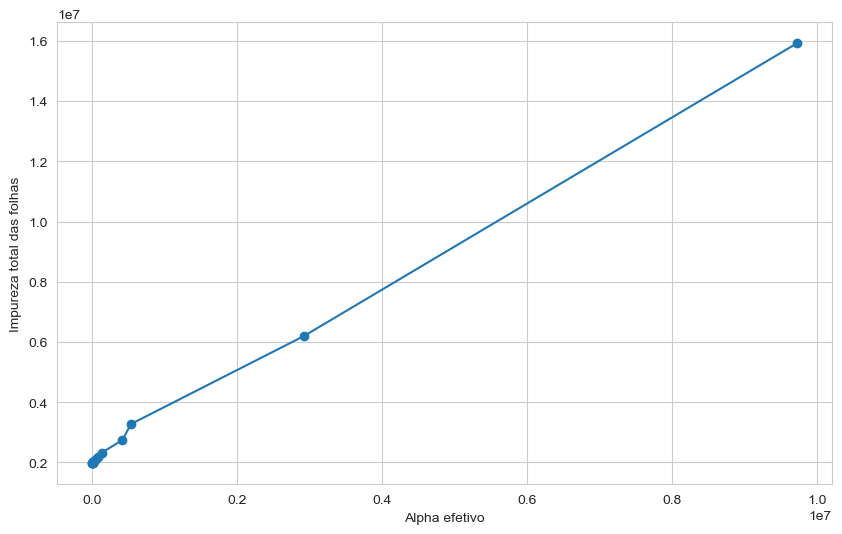

In [22]:
#Armazenando cada ccp_alpha e suas impurezas

ccp_alphas , impurities = path.ccp_alphas , path.impurities

#Plotando gráfico da relação entre o ccp_alpha e sua impureza correspondente

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities , marker = 'o')
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [23]:
#Calculando o ccp_alpha de cada árvore de regressão
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state= 100 , ccp_alpha = ccp_alpha)
    clf.fit(X_train , y_train) 
    clfs.append(clf)
clfs

[DecisionTreeRegressor(random_state=100),
 DecisionTreeRegressor(ccp_alpha=2229.1642747514816, random_state=100),
 DecisionTreeRegressor(ccp_alpha=2617.762596729757, random_state=100),
 DecisionTreeRegressor(ccp_alpha=5037.165458497251, random_state=100),
 DecisionTreeRegressor(ccp_alpha=5513.39482593281, random_state=100),
 DecisionTreeRegressor(ccp_alpha=14312.395282378013, random_state=100),
 DecisionTreeRegressor(ccp_alpha=16294.310775252234, random_state=100),
 DecisionTreeRegressor(ccp_alpha=18395.542069230578, random_state=100),
 DecisionTreeRegressor(ccp_alpha=23079.201912911027, random_state=100),
 DecisionTreeRegressor(ccp_alpha=56051.948259889, random_state=100),
 DecisionTreeRegressor(ccp_alpha=79994.05040791369, random_state=100),
 DecisionTreeRegressor(ccp_alpha=133236.5402853015, random_state=100),
 DecisionTreeRegressor(ccp_alpha=414626.3204063267, random_state=100),
 DecisionTreeRegressor(ccp_alpha=535654.5585489449, random_state=100),
 DecisionTreeRegressor(ccp_alpha=

In [24]:
trees_depths = [clf.tree_.max_depth for clf in clfs] #Armazenando árvores com profudidade máxima
trees_depths

[41, 10, 8, 7, 7, 5, 4, 4, 4, 3, 3, 3, 2, 2, 2, 0]

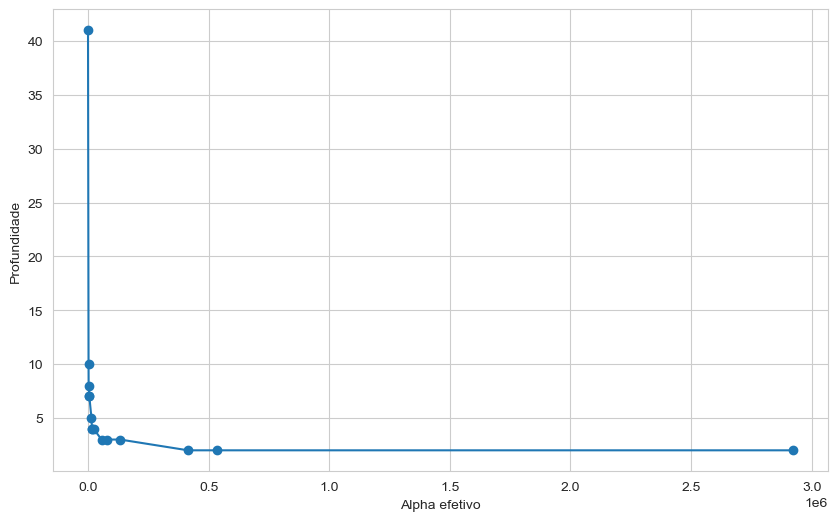

In [26]:
plt.figure(figsize = (10, 6))
plt.plot(ccp_alphas[:-1] , trees_depths[:-1] , marker = 'o')
plt.xlabel('Alpha efetivo')
plt.ylabel('Profundidade')

plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [29]:
from sklearn.metrics import mean_squared_error

mse_trees = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
mse_trees

[6199223.134140529,
 2743104.7768940344,
 2059195.9175346033,
 1971716.9803389206,
 1900572.244784923,
 1851811.0820199908,
 1805734.1384724337,
 1757710.1420558728,
 1704386.635468065,
 1631518.8587344997]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

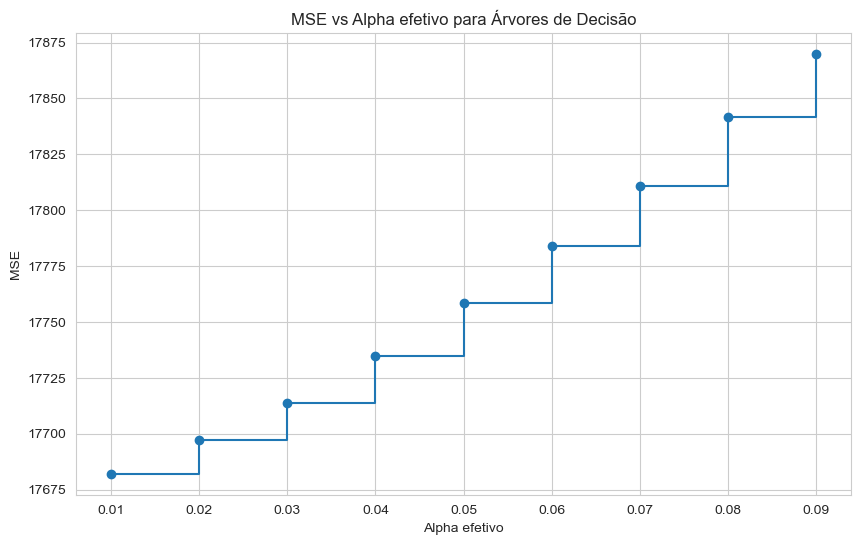

In [31]:
# Preparar os dados (ajustar as colunas conforme necessário)
X = boston.drop(['price', 'cut', 'color', 'clarity'], axis=1)  # Supondo que a coluna 'price' é o target
y = boston['price']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar múltiplos modelos de árvore de decisão com poda baseada em complexidade
clfs = []
ccp_alphas = []

# Treinamento com diferentes valores de ccp_alpha
for alpha in np.linspace(0.01, 0.1, 10):
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    ccp_alphas.append(alpha)

# Calcular o erro quadrático médio (MSE) para cada árvore de decisão
mse_trees = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]

# Garantir que as listas tenham o mesmo comprimento
ccp_alphas = ccp_alphas[:-1]
mse_trees = mse_trees[:-1]

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_trees, marker='o', drawstyle="steps-post")
plt.xlabel('Alpha efetivo')
plt.ylabel('MSE')
plt.title('MSE vs Alpha efetivo para Árvores de Decisão')
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [32]:
clfs[1].score(X_train , y_train)

0.9988883608036467

### 7. Visualize esta árvore.

In [ ]:
# Treinamento com diferentes valores de ccp_alpha
for alpha in np.linspace(0.01, 0.1, 10):
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    ccp_alphas.append(alpha)

# Calcular o erro quadrático médio (MSE) para cada árvore de decisão
mse_trees = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]

# Garantir que as listas tenham o mesmo comprimento
ccp_alphas = ccp_alphas[:-1]
mse_trees = mse_trees[:-1]

# Plotar a árvore de decisão usando matplotlib
plt.figure(figsize=(20, 10))
plot_tree(clfs[1], feature_names=X.columns, filled=True)
plt.title("Árvore de Decisão - Boston Housing Dataset")
plt.show()